# **Python und SQLite Datenbanken**

Eine *Datenbank* (**DB**) dient zur Speicherung größerer Datenmengen, zur übersichtlichen Darstellung von Daten und zur komfortablen Änderung von Daten. Das sog. *relationale Datenbankmodell* ist dabei das flexibelste und am meisten genutzte Modell in heutigen *Datenbankmanagementsystemen* (**DBMS**)

Python lässt sich leicht mit einer SQLite Datenbank verbinden. In diesem Demoscript wird der Zugriff und Umgang von Python mit dem Datenbankmanagementsystem **SQLite** exemplarisch dargestellt. 

SQLite erfordert keine aufwändige Installation eines Datenbankservers und basiert auf Textdateien. Wie viele andere relationale Datenbanksysteme ist es SQL-basiert. Bei der *Structured Query Language* (**SQL**) handelt es sich  bekanntlich um die am meisten verwendete Datenbanksprache.

Zwei Szenarien:  
1. Eine bestehende SQLite Datenbank (chinook) aus Python ansprechen, *öffnen und abfragen*  
2. Aus Python eine neue SQLite basierte Datenbank (company) *erstellen und darin Daten abspeichern*  

Quellen:
+ [SQLite in Python Tutorial](https://www.sqlitetutorial.net/sqlite-python/)
+ [Thomas Theis, Informatik Aktuell](https://www.informatik-aktuell.de/betrieb/datenbanken/datenbanken-mit-python-und-sqlite.html)

Datum:
+ 16.03.2022 initial for BINA-FS22

Autor:
+ dr. daniel benninger  

---



## **Szenario 1: Bestehende SQLite Datenbank öffnen und abfragen** 

Als Beispieldatenbank verwenden wir die **Chinook Sample Database** des [SQLite Tutorials](https://www.sqlitetutorial.net/sqlite-sample-database/)   
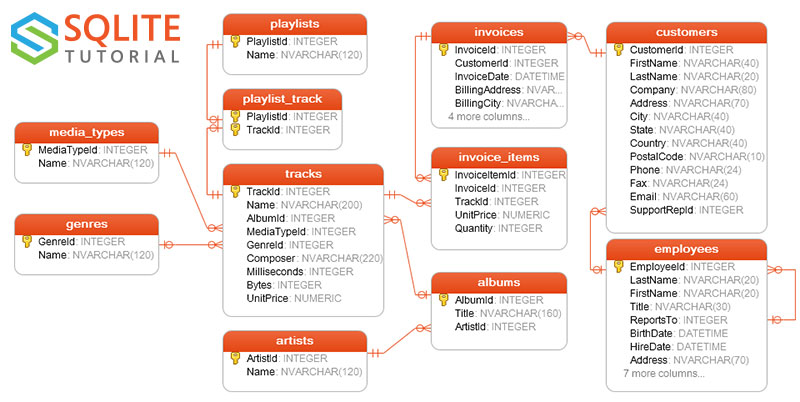

In [ ]:
# Import libraries
import os, sys, sqlite3

In [ ]:
# creating file (path) name
dbfile = '/content/sample_data/sqlite-sample-database-chinook.db'

In [ ]:
# Test if the "Chinook Sample Database" file is available in the colab workspace
if os.path.exists(dbfile):
    print("OK, Chinook Sample Database Datei ist vorhanden")
else:
    print("notOK, Chinook Sample Database Datei ist NICHT vorhanden. Bitte manuell in den workspace hochladen!")
    sys.exit(0)

OK, Chinook Sample Database Datei ist vorhanden


In [ ]:
# Create/Open a (SQL)connection to the SQLite database
connection = sqlite3.connect(dbfile)

In [ ]:
# Create a data cursor to fetch the query results into python
cursor = connection.cursor()

### 1.1 Read the overall data structure (all data model in the connected database)

In [ ]:
# reading all TABLE names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master  WHERE type = 'table' ")]

# here is your list
print(table_list)

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


In [ ]:
# reading all INDEX names
index_list = [a for a in cursor.execute("SELECT name FROM sqlite_master  WHERE type = 'index' ")]

# here is your list
print(index_list)

[('sqlite_autoindex_playlist_track_1',), ('IFK_AlbumArtistId',), ('IFK_CustomerSupportRepId',), ('IFK_EmployeeReportsTo',), ('IFK_InvoiceCustomerId',), ('IFK_InvoiceLineInvoiceId',), ('IFK_InvoiceLineTrackId',), ('IFK_PlaylistTrackTrackId',), ('IFK_TrackAlbumId',), ('IFK_TrackGenreId',), ('IFK_TrackMediaTypeId',)]


### 1.2 Query (select) data from existing tables  

---  
+ Query all records (data) in the **ALBUMS** table

In [ ]:
# Formulate the SQL Query
sql = "SELECT * FROM albums"

# Control the SQL Query
print(sql)

# Execute the SQL Query and fetch the results into cursor variable
cursor.execute(sql)

# Show the resultarray, record by record
for record in cursor:
     print(record[0], record[1], record[2])

In [ ]:
# Close database connection
# connection.close()

In [ ]:
# inspect no of values (cells) in the result record
print(len(record))

3


In [ ]:
# inspect allvalues (cells) in the last record
for cell in record:
   print(cell)

347
Koyaanisqatsi (Soundtrack from the Motion Picture)
275


---  
+ Query all records (data) in the **ARTIST** table

In [ ]:
# Formulate the SQL Query
sql = "SELECT * FROM artists"

# Control the SQL Query
print(sql)

# Execute the SQL Query and fetch the results into cursor variable
cursor.execute(sql)

# Show the resultarray, record by record
for record in cursor:
     print(record[0], record[1])

---  
+ Query all records from the **ALBUMS table with the corresponding ARTIST table values** (using the 1-many realstionship of ARTIST -> ALBUMS)

In [ ]:
# Formulate the SQL Query
sql = "SELECT AlbumId, Title, artists.Name FROM albums, artists WHERE albums.ArtistId = artists.ArtistId"

# Control the SQL Query
print(sql)

# Execute the SQL Query and fetch the results into cursor variable
cursor.execute(sql)

# Show the resultarray, record by record
for record in cursor:
     print(record[0], record[1], record[2])

 
+ ... and combining with a **filter** clause, by selecting a single *artists.Name* value

In [ ]:
# Formulate the SQL Query
sql = "SELECT AlbumId, Title, artists.Name FROM albums, artists WHERE albums.ArtistId = artists.ArtistId AND artists.Name ='Gilberto Gil'"

# Control the SQL Query
print(sql)

# Execute the SQL Query and fetch the results into cursor variable
cursor.execute(sql)

# Show the resultarray, record by record
for record in cursor:
     print(record[0], record[1], record[2])

SELECT AlbumId, Title, artists.Name FROM albums, artists WHERE albums.ArtistId = artists.ArtistId AND artists.Name ='Gilberto Gil'
85 As Canções de Eu Tu Eles Gilberto Gil
86 Quanta Gente Veio Ver (Live) Gilberto Gil
87 Quanta Gente Veio ver--Bônus De Carnaval Gilberto Gil


### 1.3 Store the selected data from the database into a **Panda dataframe** for further analytical processing  

--- 

In [ ]:
# import library
import pandas as pd

In [ ]:
# formulate the SQL Query
sql = "SELECT AlbumId, Title, artists.Name FROM albums, artists WHERE albums.ArtistId = artists.ArtistId"

# Control the SQL Query
print(sql)

SELECT AlbumId, Title, artists.Name FROM albums, artists WHERE albums.ArtistId = artists.ArtistId


In [ ]:
# execute the SQL Query and fetch the results into a panda dataframe variable
df = pd.read_sql(sql,connection)

In [ ]:
# inspect the dataframe variable
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AlbumId  347 non-null    int64 
 1   Title    347 non-null    object
 2   Name     347 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.3+ KB
None


In [ ]:
print(df.head(5))

   AlbumId                                  Title       Name
0        1  For Those About To Rock We Salute You      AC/DC
1        2                      Balls to the Wall     Accept
2        3                      Restless and Wild     Accept
3        4                      Let There Be Rock      AC/DC
4        5                               Big Ones  Aerosmith


In [ ]:
print(df.describe())

          AlbumId
count  347.000000
mean   174.000000
std    100.314505
min      1.000000
25%     87.500000
50%    174.000000
75%    260.500000
max    347.000000


### 1.4 Close Database Connection and Exit  

In [ ]:
# Close the database connection
connection.close()

sys.exit(0)

## **Szenario 2: Neue SQLite Datenbank erstellen und Daten einfüllen/abspeichern**

In [ ]:
# Import libraries
import os, sys, sqlite3

# creating file (path) name
dbfile = '/content/sample_data/sqlite-company-database.db'

# Test if the database file is available in the colab workspace
if os.path.exists(dbfile):
    print("notOK, Company Database Datei existiert bereits im Colab Workspace!")
    sys.exit(0)
else:
    print("OK, Company Database Datei existiert noch nicht, kann nun im Colab Workspace erstellt werden")


OK, Company Database Datei existiert noch nicht, kann nun im Colab Workspace erstellt werden


### 2.1 Create and open a new SQLite database

In [ ]:
# Create database (file) and Open a (SQL) connection 
connection = sqlite3.connect(dbfile)

# Create a data cursor to exchange information between Python and SQLite
cursor = connection.cursor()

### 2.2 Create (new) tables within the database and Insert data
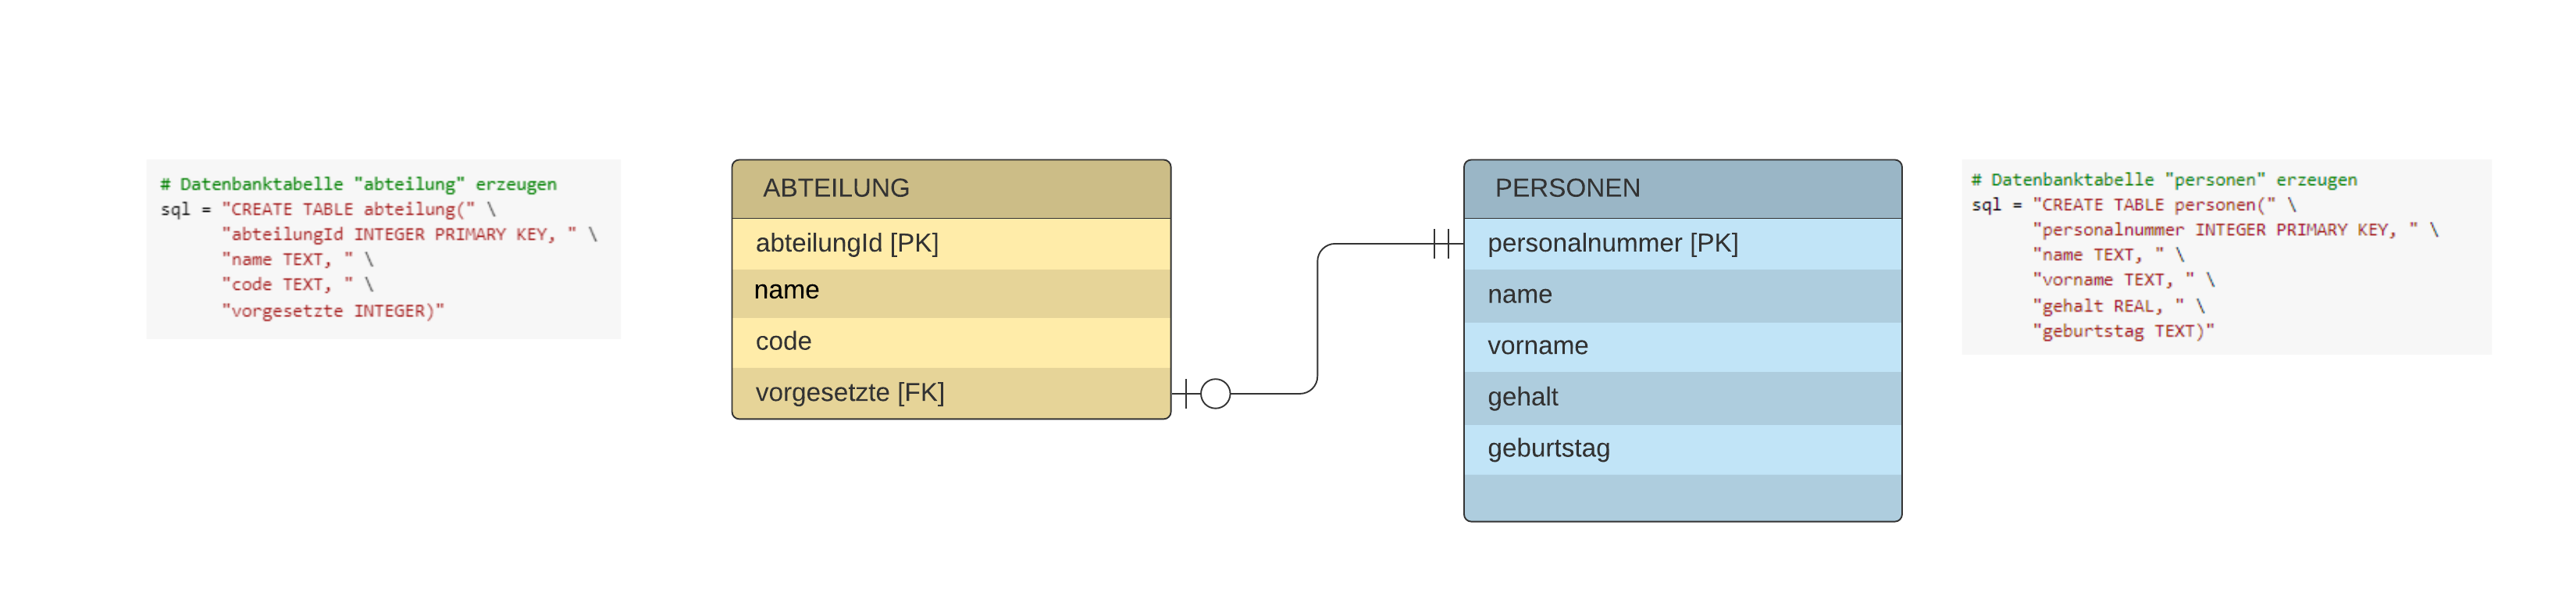

---  
+ Create Table PERSONEN

In [ ]:
# Datenbanktabelle "personen" erzeugen
sql = "CREATE TABLE personen(" \
      "personalnummer INTEGER PRIMARY KEY, " \
      "name TEXT, " \
      "vorname TEXT, " \
      "gehalt REAL, " \
      "geburtstag TEXT)"

cursor.execute(sql)


+ ... and insert Data into the table PERSONEN

In [ ]:
# 1.Datensatz erzeugen
sql = "INSERT INTO personen VALUES(6714,'Meier', " \
      "'Hans', 6500, '15.03.1962')"
cursor.execute(sql)
connection.commit()

# 2.Datensatz erzeugen
sql = "INSERT INTO personen VALUES(81343,'Schmied', " \
      "'Patrick', 7750, '12.04.1968')"
cursor.execute(sql)
connection.commit()

# 3. Datensatz erzeugen
sql = "INSERT INTO personen VALUES(2297,'Wilker', " \
      "'Julia', 3725.5, '30.12.1979')"
cursor.execute(sql)
connection.commit()


In [ ]:
# SQL-Abfrage
sql = "SELECT * FROM personen"

# Kontrollausgabe der SQL-Abfrage
print(sql)

# Absenden der SQL-Abfrage und Empfang des Ergebnisses im cursor
cursor.execute(sql)

# Ausgabe des Ergebnisses
for datensatz in cursor:
    print(datensatz[0], datensatz[1], datensatz[2], datensatz[3], datensatz[4])


SELECT * FROM personen
2297 Wilker Julia 3725.5 30.12.1979
6714 Meier Hans 6500.0 15.03.1962
81343 Schmied Patrick 7750.0 12.04.1968


---  
+ Create table ABTEILUNG

In [ ]:
# Datenbanktabelle "abteilung" erzeugen
sql = "CREATE TABLE abteilung(" \
      "abteilungId INTEGER PRIMARY KEY, " \
      "name TEXT, " \
      "code TEXT, " \
      "vorgesetzte INTEGER)"

cursor.execute(sql)


+ ... and insert Data into the table ABTEILUNG

In [ ]:
# 1.Datensatz erzeugen
sql = "INSERT INTO abteilung VALUES(111,'Finanzen', 'FIN', 81343)"
cursor.execute(sql)
connection.commit()

# 2.Datensatz erzeugen
sql = "INSERT INTO abteilung VALUES(343,'Foschung', 'R&D', 2297)"
cursor.execute(sql)
connection.commit()

In [ ]:
# SQL-Abfrage
sql = "SELECT * FROM abteilung"

# Kontrollausgabe der SQL-Abfrage
print(sql)

# Absenden der SQL-Abfrage und Empfang des Ergebnisses im cursor
cursor.execute(sql)

# Ausgabe des Ergebnisses
for datensatz in cursor:
    print(datensatz[0], datensatz[1], datensatz[2], datensatz[3])

SELECT * FROM abteilung
111 Finanzen FIN 81343
343 Foschung R&D 2297


### 2.3 Close Database Connection and Exit  

In [ ]:
# Close the database connection
connection.close()